In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pyblock

# Manual style for plots
import sys
sys.path.append('../')
import style
from blockAverage import blockAverage

In [4]:
files=[]
headers=[]
for s in style.sys_nms:
    # last 800ns for all systems
    files.append('csv_files/rg_A_'+s+'.csv') # LYS chain
    headers.append(s+'_A')
    files.append('csv_files/rg_B_'+s+'.csv') # GLU chain
    headers.append(s+'_B')
    
# Create an empty list to store data frames
dfs = []
for i in range(12):
    dfs.append(pd.read_csv(files[i],header=None,names=[headers[i]]))
    
# Concatenate Dataframes into a single Dataframe
df = pd.concat(dfs,axis=1)

print(df.head())
print(df.shape)

       pkg_A      pkg_B      pka_A      pka_B      pkl_A      pkl_B  \
0  13.261070  11.500967  10.657073  10.976684  13.066390  12.184568   
1  13.138857  11.387900  10.373121  10.931108  13.557169  12.241264   
2  13.487241  11.019668  10.359385  10.868215  13.850608  12.468407   
3  12.854655  10.716737  10.322667  11.129118  13.592215  12.099007   
4  12.621601  10.374396  10.347535  11.027280  13.748266  11.673682   

      pkkg_A     pkkg_B     pkka_A     pkka_B     pkkl_A     pkkl_B  
0  12.414816  13.573735  13.470500  12.281093  15.419466  17.260647  
1  12.245254  13.658149  13.991453  13.162977  14.838962  17.477964  
2  12.443722  14.497189  14.489116  14.066375  14.422278  16.464527  
3  11.876780  13.531511  13.053917  13.441572  15.610246  19.054226  
4  11.636685  12.810650  14.589980  14.600659  14.267920  16.939390  
(400, 12)


In [5]:
print(style.color_arr)

['#FFE4E1', '#CD5C5C', '#CD2626', '#BFEFFF', '#00BFFF', '#104E8B']


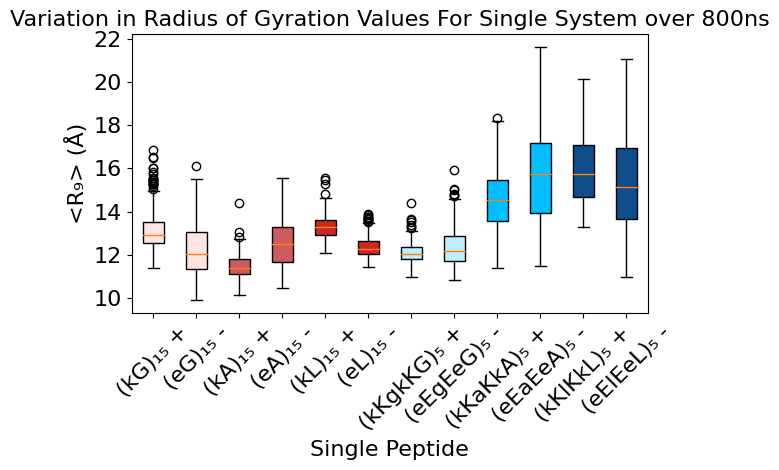

In [6]:
colors=['#FFE4E1','#FFE4E1','#CD5C5C','#CD5C5C','#CD2626','#CD2626','#BFEFFF','#BFEFFF','#00BFFF','#00BFFF','#104E8B','#104E8B']
pep_labels=["(kG)₁₅ +","(eG)₁₅ -",'(kA)₁₅ +','(eA)₁₅ -','(kL)₁₅ +','(eL)₁₅ -','(kKgkKG)₅ +','(eEgEeG)₅ -','(kKaKkA)₅ +','(eEaEeA)₅ -','(kKlKkL)₅ +','(eElEeL)₅ -']

bplot = plt.boxplot(x=df,patch_artist=True)
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    
plt.title('Variation in Radius of Gyration Values For Single System over 800ns',fontsize=style.font_size)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],pep_labels,rotation=45,fontsize=style.font_size)
plt.yticks(fontsize=style.font_size)
plt.xlabel('Single Peptide',fontsize=style.font_size)
plt.ylabel('<R₉> (Å)',fontsize=style.font_size)
plt.tight_layout()

#plt.savefig("RG_single.png",dpi=600)

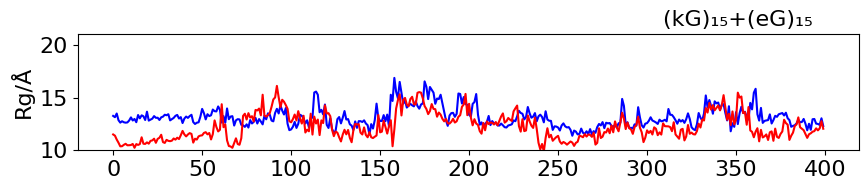

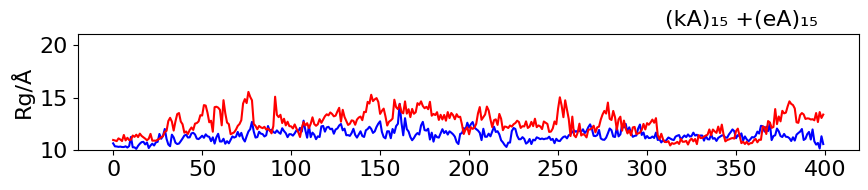

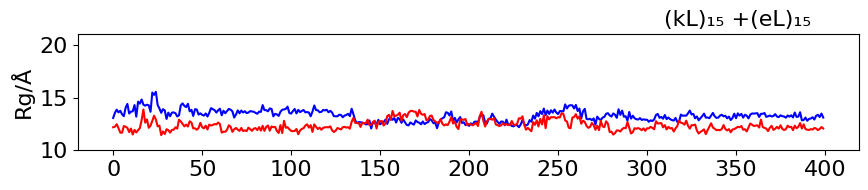

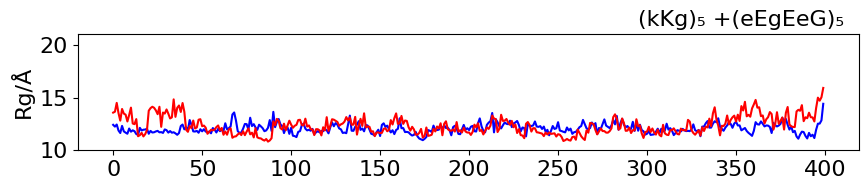

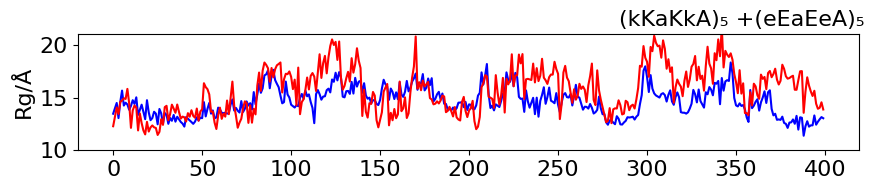

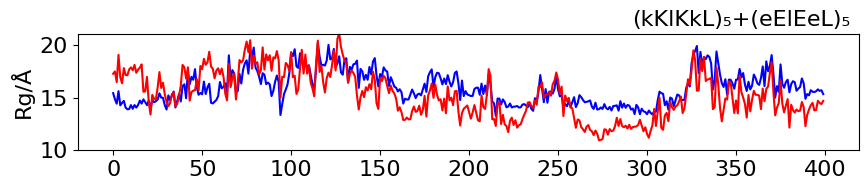

In [7]:
for i in range(0,12,2):
    plt.figure(figsize=(9,2))
    plt.plot(dfs[i], color='blue')
    plt.plot(dfs[i+1], color='red')
    
    plt.ylim(10,21)
    plt.title(style.sys_labels[int(i/2)],y=1.0,x=0.85,fontsize=style.font_size)
    plt.ylabel('Rg/Å',fontsize=style.font_size)
    plt.yticks(fontsize=style.font_size)
    plt.xticks(fontsize=style.font_size)
    plt.tight_layout()
    
    #plt.savefig("RG_single_series"+str(i)+".png",dpi=600)

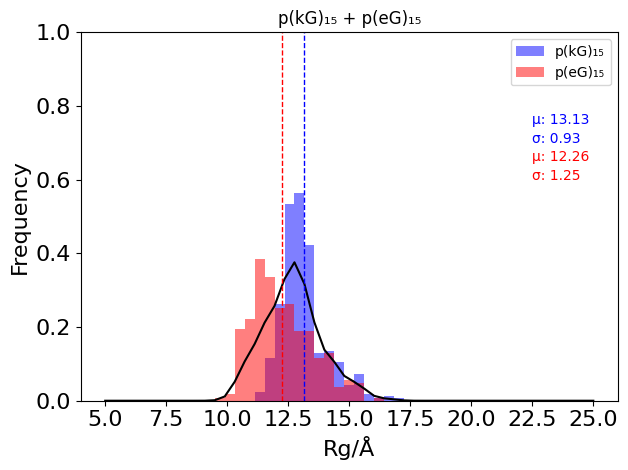

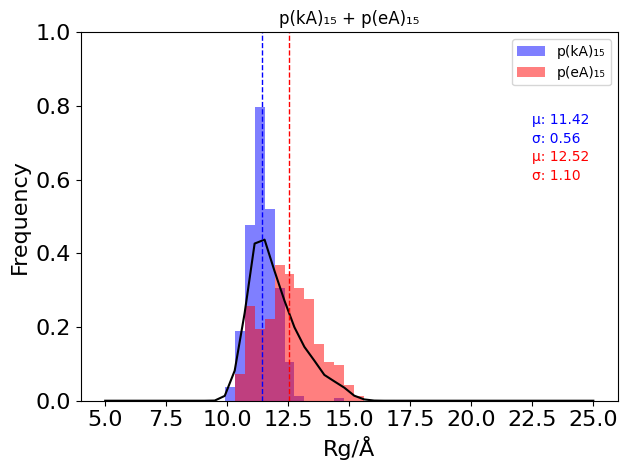

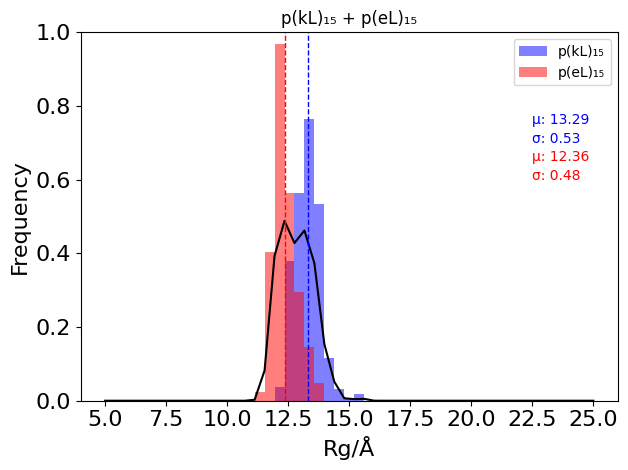

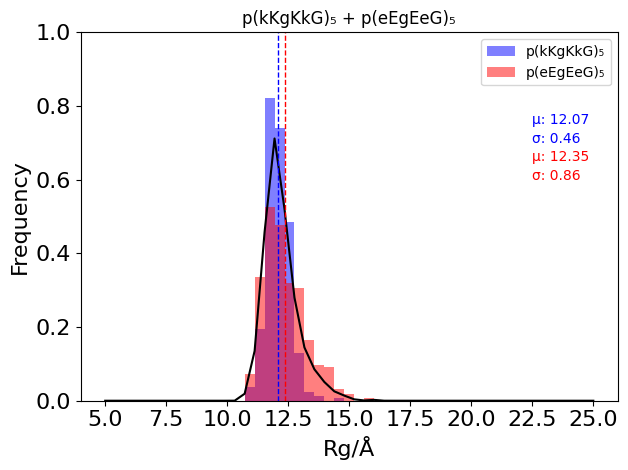

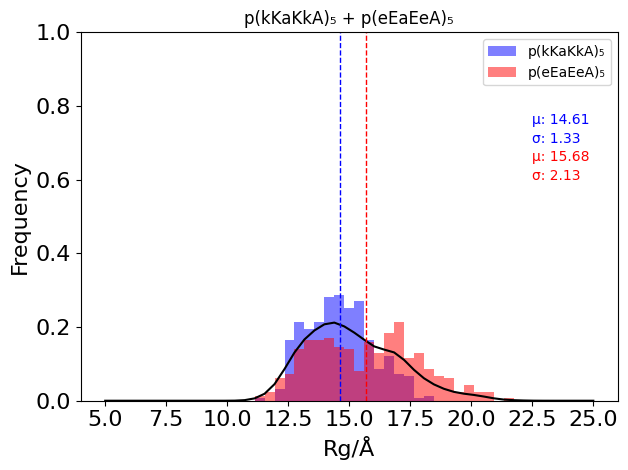

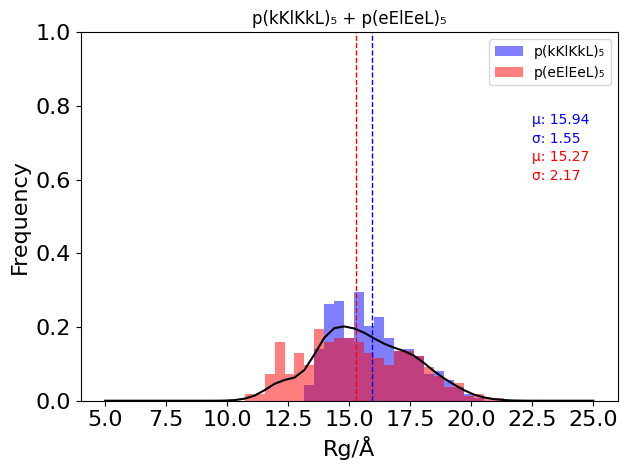

In [8]:
import scipy.stats as stats
pep_labels = ["p(kG)₁₅","p(eG)₁₅",'p(kA)₁₅','p(eA)₁₅','p(kL)₁₅','p(eL)₁₅','p(kKgKkG)₅','p(eEgEeG)₅','p(kKaKkA)₅','p(eEaEeA)₅','p(kKlKkL)₅' ,'p(eElEeL)₅']

for i in range(0,12,2):
    plt.clf()
    arA = np.array( dfs[i] )
    arB = np.array( dfs[i+1] )
    
    ar = np.array([arA,arB]) # All data
    ar = ar.flatten()
    density = stats.gaussian_kde(ar)
    
    plt.hist(arA,  bins=np.linspace(5, 25, 50), histtype='stepfilled', density=True,color="blue",alpha=0.5,label=pep_labels[i])
    n, x, _ = plt.hist(arB,  bins=np.linspace(5, 25, 50), histtype='stepfilled', density=True,color="red",alpha=0.5,label=pep_labels[i+1])
    plt.plot(x, density(x), color = "black")
    
    plt.legend()
    min_ylim, max_ylim = plt.ylim(0, 1.0)
    
    plt.axvline(arA.mean(), color='blue', linestyle='dashed', linewidth=1)
    plt.text(x.mean()*1.5, max_ylim*0.75, 'μ: {:.2f}'.format(arA.mean()), color="blue")
    plt.text(x.mean()*1.5, max_ylim*0.70, 'σ: {:.2f}'.format(arA.std()), color="blue")
    
    plt.axvline(arB.mean(), color='red', linestyle='dashed', linewidth=1)
    plt.text(x.mean()*1.5, max_ylim*0.65, 'μ: {:.2f}'.format(arB.mean()), color="red")
    plt.text(x.mean()*1.5, max_ylim*0.60, 'σ: {:.2f}'.format(arB.std()), color="red")
    
    plt.title(pep_labels[i]+" + "+pep_labels[i+1])
    plt.xlabel('Rg/Å',fontsize=style.font_size)
    plt.ylabel('Frequency',fontsize=style.font_size)
    plt.yticks(fontsize=style.font_size)
    plt.xticks(fontsize=style.font_size)
    
    plt.tight_layout()
    plt.show()
    #plt.savefig(str(i)+"_RG_S_400fr_hist.png",dpi=600)
    
    #plt.ylim(0,150)
    #plt.xlim(10,21)

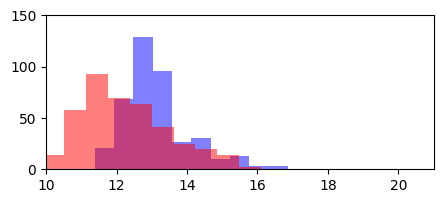

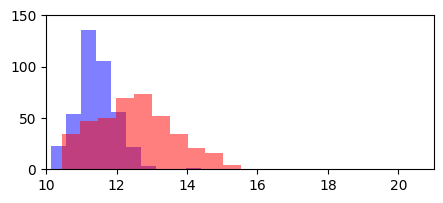

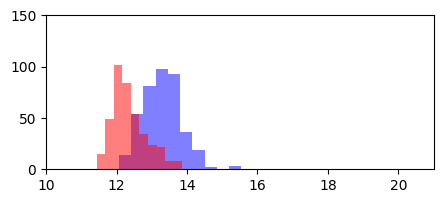

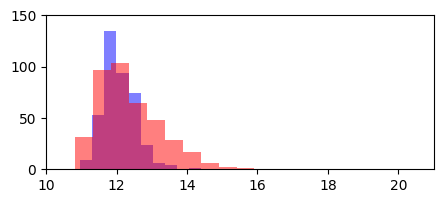

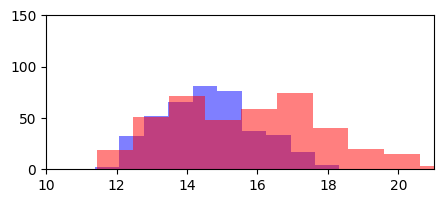

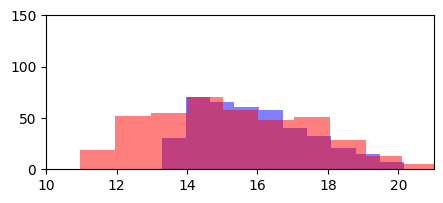

In [9]:
for i in range(0,12,2):
    plt.figure(figsize=(5,2))
    plt.hist(dfs[i], color='blue',alpha=0.5)
    plt.hist(dfs[i+1], color='red',alpha=0.5)
    plt.ylim(0,150)
    plt.xlim(10,21)
    #plt.savefig("singly_rgyr_series2.png",dpi=600)

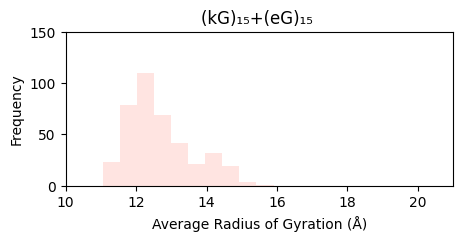

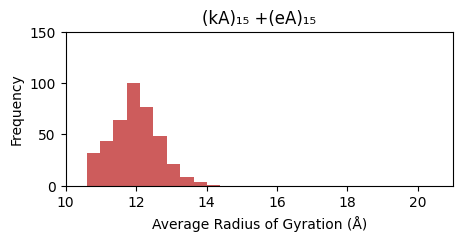

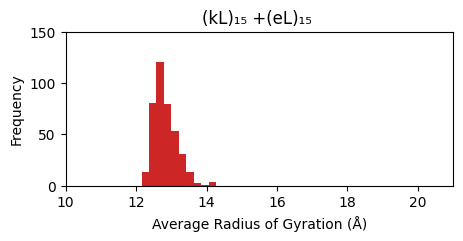

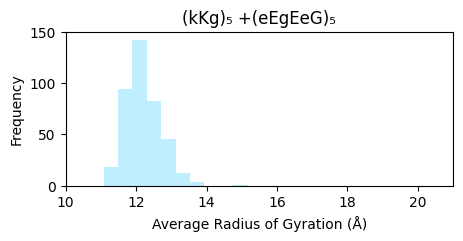

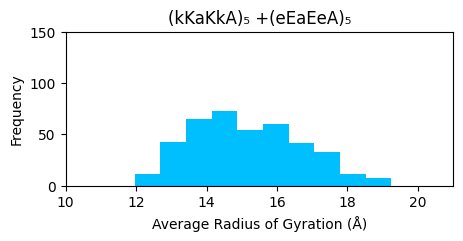

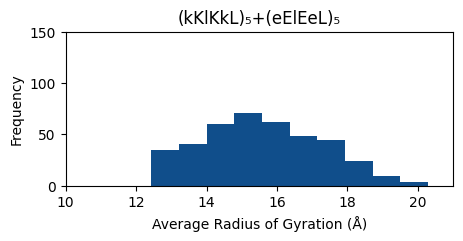

In [10]:
for i in range(0,12,2):
    plt.figure(figsize=(5,2))
    tmp = [dfs[i],dfs[i+1]] # LYS and GLU data for 1 system
    tmp = np.mean(tmp,axis=0)
    plt.hist(tmp, color=style.color_arr[int(i/2)])
    
    plt.title(style.sys_labels[int(i/2)],y=1.0)
    plt.xlabel('Average Radius of Gyration (Å)')
    plt.ylabel('Frequency')
    plt.ylim(0,150)
    plt.xlim(10,21)
    
    #plt.savefig("singly_rgyr_series2.png",dpi=600)